In [2]:
from datetime import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
import matplotlib.pyplot as plt

print('{} version: {}'.format(tf.__name__, tf.__version__))
print("Num GPU Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())

tensorflow version: 2.4.1
Num GPU Available:  1
/device:GPU:0


# Prepare Tensorflow callbacks

In [37]:
logdir = "logs/keras/mnist/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Load data

In [38]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)
print(train_labels[0])



(60000, 28, 28)
5


# Verify data
To verify that the data is in corrrect format and we're ready to build and train the network,
let's display the first 25 images from the training set and the class name (number) below each image

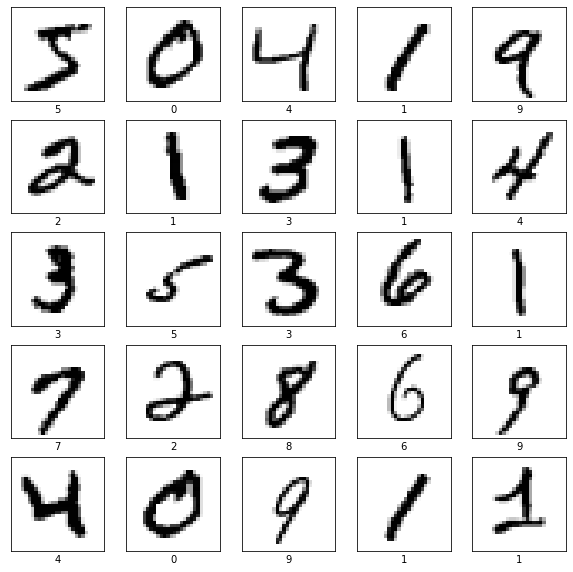

In [43]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Create and train model

In [47]:

model = keras.models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir
)
model.fit(x_train, y_train,
        epochs=20,
        validation_data=(x_test, y_test),
        callbacks=[tensorflow_callback])


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3623 - accuracy: 0.8931 - val_loss: 0.1085 - val_accuracy: 0.9656
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0985 - accuracy: 0.9700 - val_loss: 0.0829 - val_accuracy: 0.9729
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9804 - val_loss: 0.0645 - val_accuracy: 0.9787
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9839 - val_loss: 0.0747 - val_accuracy: 0.9768
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0388 - accuracy: 0.9871 - val_loss: 0.0654 - val_accuracy: 0.9804
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9883 - val_loss: 0.0627 - val_accuracy: 0.9820
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9904 - val_loss: 0.0716 - val_accuracy:

# Test accuracy

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0908 - accuracy: 0.9831

Test accuracy: 0.9830999970436096


# Make predictions
The model's linear outputs, logits. Attach a softmax layer to convert the logits to probalities, which are easy to interpret

In [49]:
probability_model = keras.models.Sequential([model,
                                    keras.layers.Softmax()])
predictions = probability_model.predict(test_images)  
print(predictions[0])
np.argmax(predictions[0])


[0.08533674 0.08533674 0.08533674 0.08533675 0.08533674 0.08533674
 0.08533674 0.23196927 0.08533674 0.08533674]


7

# Verify predictions

In [1]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

NameError: name 'plt' is not defined